In [1]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg

In [2]:
#PARTA
images = []
for v in range (400):
    images.append(mpimg.imread('/Users/george/Desktop/HW3/Face Data/' + str(v) + '.jpg'))


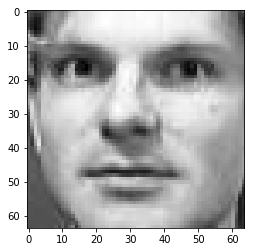

In [3]:
%matplotlib inline
plt.imshow(images[399], cmap=plt.cm.gray)





In [4]:
#PARTB
columns = []
for z in range (0, 4096):
    columns.append('Pixel ' + str(z))
X = pd.DataFrame(columns=columns)



In [5]:
for a in range(len(images)):
    fimg = images[a].flatten()
    X.loc[a] = fimg



In [6]:
X.head()




,Pixel 0,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,Pixel 9,...,Pixel 4086,Pixel 4087,Pixel 4088,Pixel 4089,Pixel 4090,Pixel 4091,Pixel 4092,Pixel 4093,Pixel 4094,Pixel 4095
0,186,183,179,190,212,219,221,232,230,231,...,56,45,47,18,0,8,15,9,3,5
1,204,198,194,195,198,195,190,186,190,193,...,19,0,29,52,90,146,130,120,164,167
2,86,79,82,95,100,102,121,146,169,179,...,160,167,179,169,192,188,197,189,185,141
3,61,90,98,119,144,156,174,177,183,195,...,119,244,246,168,126,187,162,145,58,18
4,99,134,165,183,201,210,215,224,232,236,...,83,90,94,90,70,41,71,103,92,117


In [7]:
labels_csv = pd.read_csv('/Users/george/Desktop/HW3/Face Data/label.csv')
y = labels_csv['Label']

In [8]:
type (y)
y


0      13
1      30
2      34
3      19
4      24
5       6
6      15
7      26
8      14
9      21
10      3
11     13
12     11
13     34
14      1
15      5
16     29
17     14
18     20
19     19
20     17
21     26
22     12
23     34
24     17
25     31
26      7
27      1
28     28
29     10
       ..
370    24
371    11
372    26
373     7
374    33
375     2
376    16
377    33
378    38
379    17
380    38
381     3
382    19
383    31
384     8
385     7
386     8
387    29
388    24
389    27
390    21
391     0
392    35
393    19
394    25
395    32
396    19
397    11
398     4
399    17
Name: Label, Length: 400, dtype: int64

In [9]:
#PARTC
X_scaled = preprocessing.scale(X)


/Users/george/Desktop/School/Spring 2020/MachineLearning/venv/lib/python2.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype object were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
#PARTD
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=5)

In [11]:
#PARTE
k = 50 # k is the number of components (new features) after dimensionality reduction
my_pca = PCA(n_components = k)
# X_Train is feature matrix of training set before dimensionality reduction,
# X_Train_New is feature matrix of training set after dimensionality reduction:
X_train_new = my_pca.fit_transform(X_train)
X_test_new = my_pca.transform(X_test)


In [12]:
#PARTF
svc = SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1)
svc.fit(X_train_new, y_train)
y_predict = svc.predict(X_test_new)



In [13]:
s = accuracy_score(y_test, y_predict)
print('Accuracy:')
print(s)

Accuracy:
0.91


In [14]:
cm = confusion_matrix(y_test, y_predict)
print('Confusion Matrix:')
print(cm)


Confusion Matrix:
[[3 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 1]]


In [15]:
#PARTG
neuron_number = [0.1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5]

param_grid = [{'C': [0.1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5]}]

X_scaled_pca = my_pca.fit_transform(X_scaled)

grid = GridSearchCV(svc, param_grid, cv=10, scoring='accuracy', verbose=1)

grid.fit(X_scaled_pca, y)




Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    5.4s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0005, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.1, 1, 10, 100, 1000.0, 5000.0, 10000.0, 50000.0, 100000.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [16]:
print('Accuracy:')
print(grid.best_score_)
print('C:')
print(grid.best_params_)




Accuracy:
0.965
C:
{'C': 10}
